In [2]:
import pandas
import pickle as pickle
import backtest
import numpy
import math

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

In [3]:
# index data
chsashr_pi = pandas.read_csv('csvs/index_chsashr.csv')
chsashr_pi['dates'] = chsashr_pi['Unnamed: 0']
chsashr_pi = chsashr_pi.set_index('dates')
chsashr_pi = chsashr_pi.drop('Unnamed: 0', 1)
chsashr_pi['index_returns'] = chsashr_pi['PI'].pct_change()
chsashr_pi['index_returns'] = chsashr_pi['index_returns'] + 1

chzashr_pi = pandas.read_csv('csvs/index_chzashr.csv')
chzashr_pi['dates'] = chzashr_pi['Unnamed: 0']
chzashr_pi = chzashr_pi.set_index('dates')
chzashr_pi = chzashr_pi.drop('Unnamed: 0', 1)
chzashr_pi['index_returns'] = chzashr_pi['PI'].pct_change()
chzashr_pi['index_returns'] = chzashr_pi['index_returns'] + 1

In [4]:
# df_sh = pickle.load(open('temp/df_sh.pkl', 'rb'))
# date_sh = pickle.load(open('temp/date_sh.pkl', 'rb'))
# dates = pickle.load(open('temp/dates.pkl', 'rb'))
# universes = pickle.load(open('temp/universes_sh.pkl', 'rb'))
# signals_value_sh = pickle.load(open('temp/signals_value_sh.pkl', 'rb'))

df_sh = pickle.load(open('temp_momentum/df_sh.pkl', 'rb'))
date_sh = pickle.load(open('temp_momentum/date_sh.pkl', 'rb'))
dates = pickle.load(open('temp_momentum/dates.pkl', 'rb'))
universes = pickle.load(open('temp_momentum/universes_sh.pkl', 'rb'))
signals_value_sh = pickle.load(open('temp_momentum/signals_momentum_sh.pkl', 'rb'))

In [5]:
period_returns = []
dates_used = []

holding_period = 4

for i in range(0, len(dates) - holding_period, holding_period):
    date_t0 = dates[i]
    date_t1 = dates[i + holding_period]
    period_return = backtest.period_return(signals_value_sh[i], df_sh, date_t0, date_t1)
    period_returns.append(period_return)
    dates_used.append(date_t0)

pickle.dump(period_returns, open('temp/period_returns_sh.pkl', 'wb'))

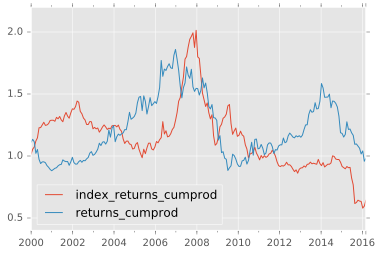

In [6]:
period_returns_sh = pickle.load(open('temp/period_returns_sh.pkl', 'rb'))
plot_data = pandas.DataFrame({'returns': period_returns_sh, 'dates': dates_used})
plot_data['dates'] = pandas.to_datetime(plot_data['dates'])
plot_data = plot_data.set_index('dates')
plot_data['returns'] = plot_data['returns'] + 1
plot_data['returns_cumprod'] = plot_data['returns'].cumprod()
plot_data = plot_data.merge(chsashr_pi, left_index=True, right_index=True)
plot_data['index_returns_cumprod'] = plot_data['index_returns'].cumprod()
plot_data['returns_std'] = plot_data['returns_cumprod'].rolling(window=52, min_periods=52).std()
plot_data['returns_annualized'] = (plot_data['returns_cumprod'] - plot_data['returns_cumprod'].shift(52)) / plot_data['returns_cumprod'].shift(52)
plot_data['index_returns_std'] = plot_data['index_returns_cumprod'].rolling(window=52, min_periods=52).std()
plot_data['index_returns_annualized'] = (plot_data['index_returns_cumprod'] - plot_data['index_returns_cumprod'].shift(52)) / plot_data['index_returns_cumprod'].shift(52)

# plot_data
plot_data[['index_returns_cumprod', 'returns_cumprod']].plot()

In [7]:
plot_data

,returns,returns_cumprod,PI,index_returns,index_returns_cumprod,returns_std,returns_annualized,index_returns_std,index_returns_annualized
2000-01-03,1.111726,1.111726,1451.900,1.015698,1.015698,NaN,NaN,NaN,NaN
2000-01-31,1.020441,1.134451,1631.524,1.038764,1.055071,NaN,NaN,NaN,NaN
2000-02-28,0.981828,1.113836,1814.783,1.016995,1.073002,NaN,NaN,NaN,NaN
2000-03-27,0.917199,1.021610,1889.534,1.044498,1.120748,NaN,NaN,NaN,NaN
2000-04-24,1.030117,1.052378,1954.889,1.023339,1.146905,NaN,NaN,NaN,NaN
2000-05-22,0.924735,0.973171,1941.130,1.070551,1.227821,NaN,NaN,NaN,NaN
2000-06-19,0.964972,0.939083,2034.282,1.000981,1.229025,NaN,NaN,NaN,NaN
2000-07-17,1.014054,0.952280,2105.201,1.017316,1.250307,NaN,NaN,NaN,NaN
2000-08-14,1.000712,0.952959,2200.368,1.017257,1.271884,NaN,NaN,NaN,NaN
2000-09-11,0.992751,0.946051,2089.886,0.980332,1.246868,NaN,NaN,NaN,NaN
